In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [4]:
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('/Users/tony/Desktop/players_dataset.csv')

In [7]:
data.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_medium,attacking_work_rate_high,attacking_work_rate_low
0,79.0,66.0,69.0,58.0,69.0,60.0,74.0,67.0,70.0,59.0,...,20.0,13.0,13.0,7.0,10.0,7.0,0,1,0,0
1,73.0,50.0,65.0,64.0,64.0,53.0,67.0,60.0,43.0,47.0,...,27.0,6.0,10.0,13.0,15.0,11.0,1,1,0,0
2,80.0,70.0,69.0,40.0,74.0,52.0,81.0,73.0,77.0,66.0,...,47.0,12.0,11.0,15.0,11.0,9.0,1,1,0,0
3,73.0,6.0,19.0,10.0,45.0,10.0,10.0,14.0,13.0,39.0,...,20.0,64.0,59.0,56.0,51.0,58.0,1,1,0,0
4,80.0,58.0,46.0,57.0,68.0,35.0,65.0,81.0,75.0,66.0,...,69.0,15.0,9.0,7.0,13.0,9.0,1,1,0,0


In [25]:
X = data.copy()
X_st = X.apply(lambda x: (x - x.mean())/x.std(), axis=0)
# X_st = X.apply(lambda x: (x - x.min())/(x.max() - x.min()), axis=0)

pc = PCA(n_components=2).fit(X_st)
X_pc = pc.transform(X_st)

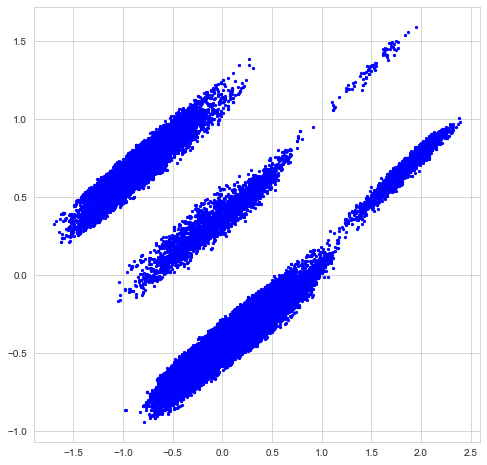

In [24]:
plt.scatter(X_pc[:, 0], X_pc[:, 1], s=5, color='blue');

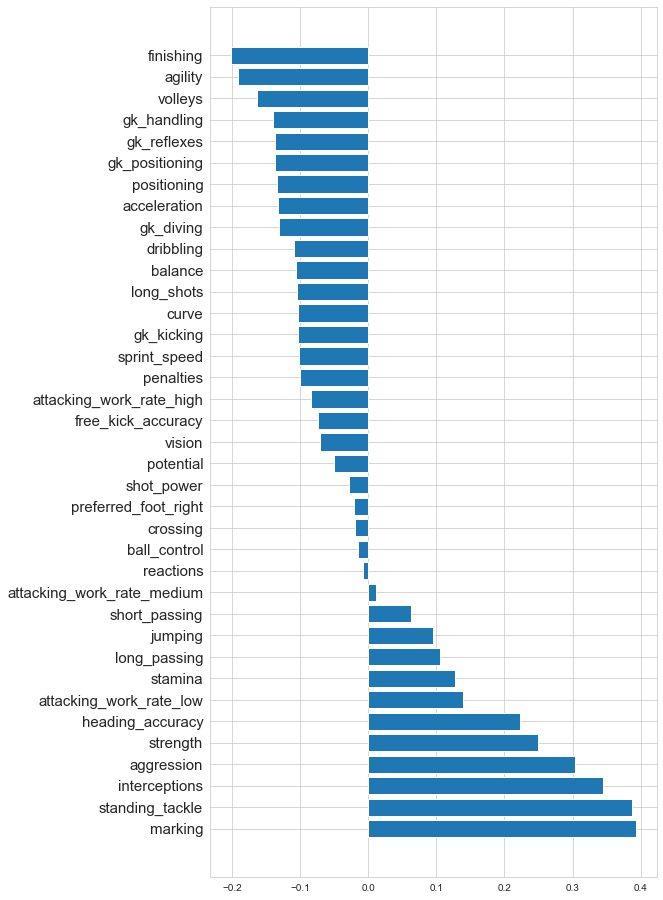

In [22]:
k = 1
features = data.columns
comp_values = pc.components_[k]

features = features[np.argsort(comp_values)[::-1]]
comp_values = np.sort(comp_values)[::-1]

plt.figure(figsize=(8, 16))
plt.barh(features, comp_values);
plt.yticks(fontsize=15);

In [26]:
X_st = np.array([
    [2, 3],
    [-3, 2],
    [1, -1],
    [1, 0],
    [0, -1],
    [-1, 1]
])